In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# data gathering
emp_df = pd.read_csv('/content/HR_comma_sep.csv')
emp_df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
emp_df['left'].value_counts()

left
0    11428
1     3571
Name: count, dtype: int64

In [ ]:
# Feature selection
emp_df.groupby('left').mean(numeric_only = True)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


<Axes: xlabel='salary'>

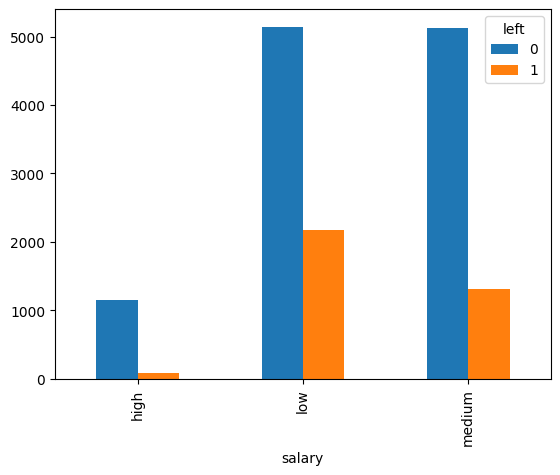

In [ ]:
pd.crosstab(emp_df['salary'], emp_df['left']).plot(kind = 'bar')

<Axes: xlabel='Department'>

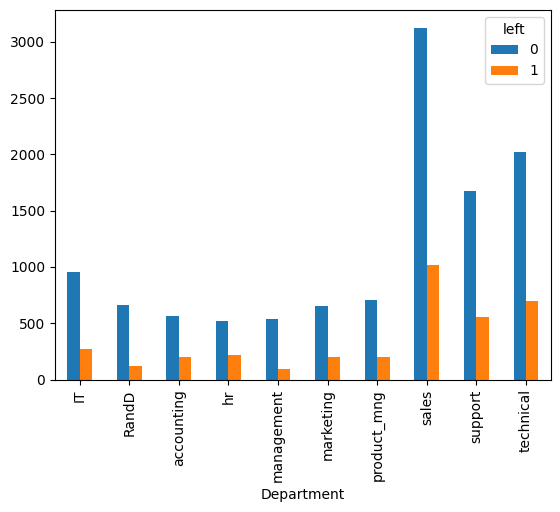

In [ ]:
pd.crosstab(emp_df['Department'], emp_df['left']).plot(kind = 'bar')

In [ ]:
X = emp_df[['satisfaction_level', 'average_montly_hours',	'time_spend_company', 'Work_accident', 'promotion_last_5years', 'salary']]

In [ ]:
X

,satisfaction_level,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary
0,0.38,157,3,0,0,low
1,0.80,262,6,0,0,medium
2,0.11,272,4,0,0,medium
3,0.72,223,5,0,0,low
4,0.37,159,3,0,0,low
...,...,...,...,...,...,...
14994,0.40,151,3,0,0,low
14995,0.37,160,3,0,0,low
14996,0.37,143,3,0,0,low
14997,0.11,280,4,0,0,low


In [ ]:
# one hot encoding
dummies = pd.get_dummies(emp_df['salary'])
dummies

,high,low,medium
0,False,True,False
1,False,False,True
2,False,False,True
3,False,True,False
4,False,True,False
...,...,...,...
14994,False,True,False
14995,False,True,False
14996,False,True,False
14997,False,True,False


In [ ]:
new_X = pd.concat([X, dummies], axis = 'columns')
new_X

,satisfaction_level,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,high,low,medium
0,0.38,157,3,0,0,low,False,True,False
1,0.80,262,6,0,0,medium,False,False,True
2,0.11,272,4,0,0,medium,False,False,True
3,0.72,223,5,0,0,low,False,True,False
4,0.37,159,3,0,0,low,False,True,False
...,...,...,...,...,...,...,...,...,...
14994,0.40,151,3,0,0,low,False,True,False
14995,0.37,160,3,0,0,low,False,True,False
14996,0.37,143,3,0,0,low,False,True,False
14997,0.11,280,4,0,0,low,False,True,False


In [ ]:
new_X.drop(columns = 'salary', inplace = True)

In [ ]:
new_X

,satisfaction_level,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,high,low,medium
0,0.38,157,3,0,0,False,True,False
1,0.80,262,6,0,0,False,False,True
2,0.11,272,4,0,0,False,False,True
3,0.72,223,5,0,0,False,True,False
4,0.37,159,3,0,0,False,True,False
...,...,...,...,...,...,...,...,...
14994,0.40,151,3,0,0,False,True,False
14995,0.37,160,3,0,0,False,True,False
14996,0.37,143,3,0,0,False,True,False
14997,0.11,280,4,0,0,False,True,False


In [ ]:
y = emp_df['left']
y

0        1
1        1
2        1
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: left, Length: 14999, dtype: int64

In [ ]:
# split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(new_X, y, test_size = 0.2, random_state= 2)

In [ ]:
X_train.shape

(11999, 8)

In [ ]:
X_test.shape

(3000, 8)

In [ ]:
# build logistic regression model
from sklearn.linear_model import LogisticRegression

In [ ]:
log_reg = LogisticRegression()

In [ ]:
# model training
log_reg.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
log_reg.classes_

array([0, 1])

In [ ]:
log_reg.coef_

array([[-3.70165221e+00,  1.41867676e-03,  2.32687581e-01,
        -1.39417509e+00, -7.51197116e-01, -1.34475614e+00,
         7.26993699e-01,  1.85118080e-01]])

In [ ]:
log_reg.intercept_

array([-0.45483535])

In [ ]:
# predictions
y_pred = log_reg.predict(X_test)

In [ ]:
y_pred[105:115]

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [ ]:
y_test[105:115]

5042     0
6756     0
3809     0
4228     0
13012    0
5756     0
4886     0
14199    0
6498     0
3823     0
Name: left, dtype: int64

In [ ]:
log_reg.score(X_test, y_test)

0.759

In [ ]:
# predicted
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
# actual values
y_test

7231     0
12081    1
5364     0
14589    1
2353     0
        ..
2886     0
7961     0
3069     0
14077    0
1154     1
Name: left, Length: 3000, dtype: int64

In [ ]:
# calculating accuracy manually
(y_test == y_pred).sum() / len(y_pred)

0.759

In [ ]:
# classification metrics
# 1. Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[2074,  193],
       [ 530,  203]])

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

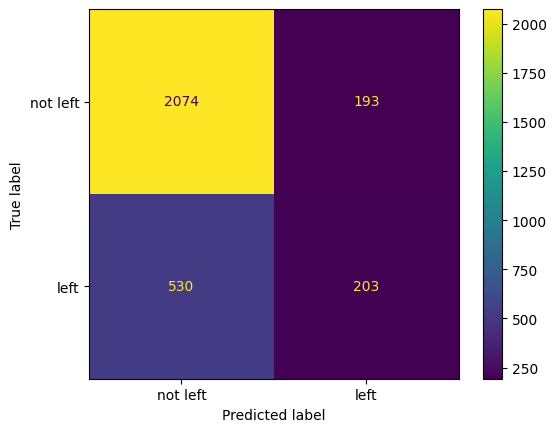

In [ ]:
cm_disp = ConfusionMatrixDisplay(cm, display_labels=['not left', 'left'])
cm_disp.plot()

In [ ]:
TP = 203
TN = 2074
FN = 530
FP = 193

In [ ]:
# 2. Accuracy
accu = (TP + TN) / (TP + TN + FP + FN)
accu

0.759

* Precision
* Proportion of actual positive from predicted positive

In [ ]:
# 3. Precision
# from confusion matrix precision
precision_cm = TP / (TP + FP)
precision_cm

0.5126262626262627

In [ ]:
from sklearn.metrics import precision_score

In [ ]:
precision_sk = precision_score(y_test, y_pred)
precision_sk

0.5126262626262627

In [ ]:
# 4. Recall
# from confusion matrix calculate recall
recall_cm = TP / (TP + FN)
recall_cm

0.27694406548431105

In [ ]:
from sklearn.metrics import recall_score

In [ ]:
recall_sk = recall_score(y_test, y_pred)
recall_sk

0.27694406548431105

In [ ]:
# 5. f1-score
f1_score_cal = 2 * precision_sk * recall_sk / (precision_sk + recall_sk)
f1_score_cal

0.3596102745792737

In [ ]:
AM = (precision_sk + recall_sk) / 2
AM

0.39478516405528685

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
f1_score_sk = f1_score(y_test, y_pred)
f1_score_sk

0.3596102745792737

In [ ]:
# classification report
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85      2267
           1       0.51      0.28      0.36       733

    accuracy                           0.76      3000
   macro avg       0.65      0.60      0.61      3000
weighted avg       0.73      0.76      0.73      3000



In [ ]:
# macro avg
(0.80 + 0.51)/2

0.655

In [ ]:
# weighted avg
0.80 * (2267 / 3000) + 0.51 * (733 / 3000)

0.7291433333333334

In [ ]:
y_test.shape

(3000,)

In [ ]:
precision_score(y_test, y_pred, average = None)

array([0.79646697, 0.51262626])

In [ ]:
recall_score(y_test, y_pred, average = None)

array([0.91486546, 0.27694407])

In [ ]:
f1_score(y_test, y_pred, average = None)

array([0.85157052, 0.35961027])

In [ ]:
pro_df = pd.DataFrame(log_reg.predict_proba(X_test))
pro_df.head(10)

,0,1
0,0.913796,0.086204
1,0.555319,0.444681
2,0.929267,0.070733
3,0.648900,0.351100
4,0.890083,0.109917
5,0.983656,0.016344
6,0.811303,0.188697
7,0.836733,0.163267
8,0.680050,0.319950
9,0.863675,0.136325


In [ ]:
thr = 0.1

In [ ]:
pro_df.loc[:,1].apply(lambda x : 1 if x > thr else 0).head(10)

0    0
1    1
2    0
3    1
4    1
5    0
6    1
7    1
8    1
9    1
Name: 1, dtype: int64

In [ ]:
log_reg.predict(X_test)[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

### ROC Curve

In [ ]:
from sklearn.metrics import roc_curve

In [ ]:
log_reg.predict_proba(X_test)[100:111]

array([[0.79002267, 0.20997733],
       [0.84948799, 0.15051201],
       [0.70294627, 0.29705373],
       [0.91069228, 0.08930772],
       [0.87897338, 0.12102662],
       [0.94110932, 0.05889068],
       [0.92611441, 0.07388559],
       [0.73789396, 0.26210604],
       [0.98586378, 0.01413622],
       [0.90084552, 0.09915448],
       [0.40769017, 0.59230983]])

In [ ]:
log_reg.predict(X_test)[100:111]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

In [ ]:
fpr, tpr, threshold = roc_curve(y_test, log_reg.predict_proba(X_test)[:,-1])

In [ ]:
threshold[:10]

array([1.8437073 , 0.8437073 , 0.8216286 , 0.81816035, 0.81724004,
       0.81020013, 0.80942744, 0.80666458, 0.80189652, 0.79707961])

In [ ]:
fpr[:10]

array([0.        , 0.00044111, 0.00132333, 0.00132333, 0.00176445,
       0.00176445, 0.00220556, 0.00220556, 0.00308778, 0.00485223])

In [ ]:
tpr[:10]

array([0.        , 0.        , 0.        , 0.00818554, 0.00818554,
       0.01091405, 0.01091405, 0.01364256, 0.01364256, 0.01364256])

Text(0, 0.5, 'tpr')

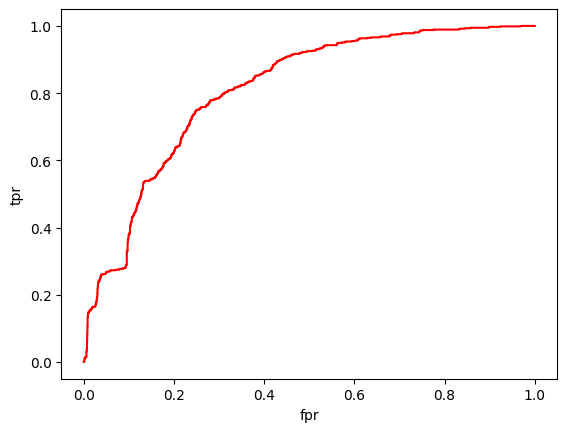

In [ ]:
plt.plot(fpr, tpr, color = 'r')
plt.xlabel('fpr')
plt.ylabel('tpr')

In [ ]:
from sklearn.metrics import auc, roc_auc_score

In [ ]:
auc(fpr, tpr)

0.8099034669686846

In [ ]:
roc_auc_score(y_test, log_reg.predict_proba(X_test)[:,-1])

0.8099034669686846

In [ ]:
best_thr_idx = np.argmax(tpr - fpr)
best_thr_idx

511

In [ ]:
best_thre = threshold[best_thr_idx]
best_thre

0.2572723155784015

In [ ]:
max(tpr - fpr)

0.5001898645432329

In [ ]:
y_pred_thre = log_reg.predict_proba(X_test)
y_pred_thre

array([[0.9137963 , 0.0862037 ],
       [0.55531925, 0.44468075],
       [0.92926714, 0.07073286],
       ...,
       [0.94874737, 0.05125263],
       [0.85491731, 0.14508269],
       [0.69623909, 0.30376091]])

In [ ]:
y_pred_thre_df = pd.DataFrame(y_pred_thre)
y_pred_thre_df

,0,1
0,0.913796,0.086204
1,0.555319,0.444681
2,0.929267,0.070733
3,0.648900,0.351100
4,0.890083,0.109917
...,...,...
2995,0.911524,0.088476
2996,0.943568,0.056432
2997,0.948747,0.051253
2998,0.854917,0.145083


In [ ]:
best_thre_y_pred = y_pred_thre_df.iloc[:, -1].apply(lambda x : 1 if x > best_thre else 0)
best_thre_y_pred

0       0
1       1
2       0
3       1
4       0
       ..
2995    0
2996    0
2997    0
2998    0
2999    1
Name: 1, Length: 3000, dtype: int64

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
model_acc = accuracy_score(y_test, y_pred)
model_acc

0.759

In [ ]:
best_thre_model_acc = accuracy_score(y_test, best_thre_y_pred)
best_thre_model_acc

0.7503333333333333

In [ ]:
(y_test == np.array(best_thre_y_pred)).sum()

2251

In [ ]:
(y_test == y_pred).sum()

2277

### 17/05/2024
#### Multi class/Multinoimial Classification

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

In [3]:
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [5]:
X = iris['data']
y = iris['target']
lables = iris['target_names']

In [6]:
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [7]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [8]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [9]:
lables

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [10]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [16]:
y_pred = log_reg.predict(X_test)

In [17]:
y_pred

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       2, 0, 2, 1, 0, 0, 1, 2])

In [18]:
y_test

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 2, 1, 0, 0, 1, 2])

In [19]:
(y_test == y_pred).sum() / len(y_pred)

0.9666666666666667

In [20]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [21]:
accuracy_score(y_test, y_pred)

0.9666666666666667

In [23]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]])

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

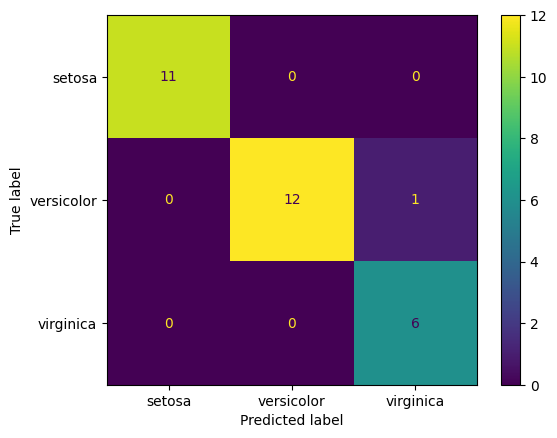

In [29]:
cm_disp = ConfusionMatrixDisplay(confusion_matrix= cm, display_labels = lables)
cm_disp.plot()

In [31]:
accu_mat = (11 + 12 + 6) / (11 + 12 + 6 + 1)
accu_mat

0.9666666666666667

In [32]:
# correct prediction in that class / total prediction of that class
precision_mat_setosa = 11 / (11 + 0 + 0)
precision_mat_setosa

1.0

In [34]:
precision_mat_versicolor = 12 / (0 + 12 + 0)
precision_mat_versicolor

1.0

In [35]:
precision_mat_verginica = 6 / (0 + 1 + 6)
precision_mat_verginica

0.8571428571428571

In [36]:
# recall for each class
recall_mat_setosa = 11 / (11 + 0 + 0)
recall_mat_setosa

1.0

In [37]:
recall_mat_versicolor = 12 / (0 + 12 + 1)
recall_mat_versicolor

0.9230769230769231

In [38]:
recall_mat_verginica = 6 / (0 + 0 + 6)
recall_mat_verginica

1.0

In [39]:
f1_score_setosa = (2 * precision_mat_setosa * recall_mat_setosa) / (precision_mat_setosa + recall_mat_setosa)
f1_score_setosa

1.0

In [40]:
f1_score_versicolor = (2 * precision_mat_versicolor * recall_mat_versicolor) / (precision_mat_versicolor + recall_mat_versicolor)
f1_score_versicolor

0.9600000000000001

In [41]:
f1_score_verginica = (2 * precision_mat_verginica * recall_mat_verginica) / (precision_mat_verginica + recall_mat_verginica)
f1_score_verginica

0.923076923076923

In [43]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



In [46]:
from sklearn.datasets import load_digits

In [47]:
digits = load_digits()
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 